In [12]:
import numpy as np 
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats


In [13]:
dfRaw = pd.read_csv('high_diamond_ranked_10min.csv')
dfRaw = dfRaw.iloc[:, 1:]

In [14]:
print(dfRaw.head())
print(dfRaw.columns)
blue_win = dfRaw.blueWins
print(blue_win.value_counts())

   blueWins  blueWardsPlaced  blueWardsDestroyed  blueFirstBlood  blueKills  \
0         0               28                   2               1          9   
1         0               12                   1               0          5   
2         0               15                   0               0          7   
3         0               43                   1               0          4   
4         0               75                   4               0          6   

   blueDeaths  blueAssists  blueEliteMonsters  blueDragons  blueHeralds  ...  \
0           6           11                  0            0            0  ...   
1           5            5                  0            0            0  ...   
2          11            4                  1            1            0  ...   
3           5            5                  1            0            1  ...   
4           6            6                  0            0            0  ...   

   redTowersDestroyed  redTotalGold  redAvgL

Text(0.5, 1.0, 'Correlation between variables')

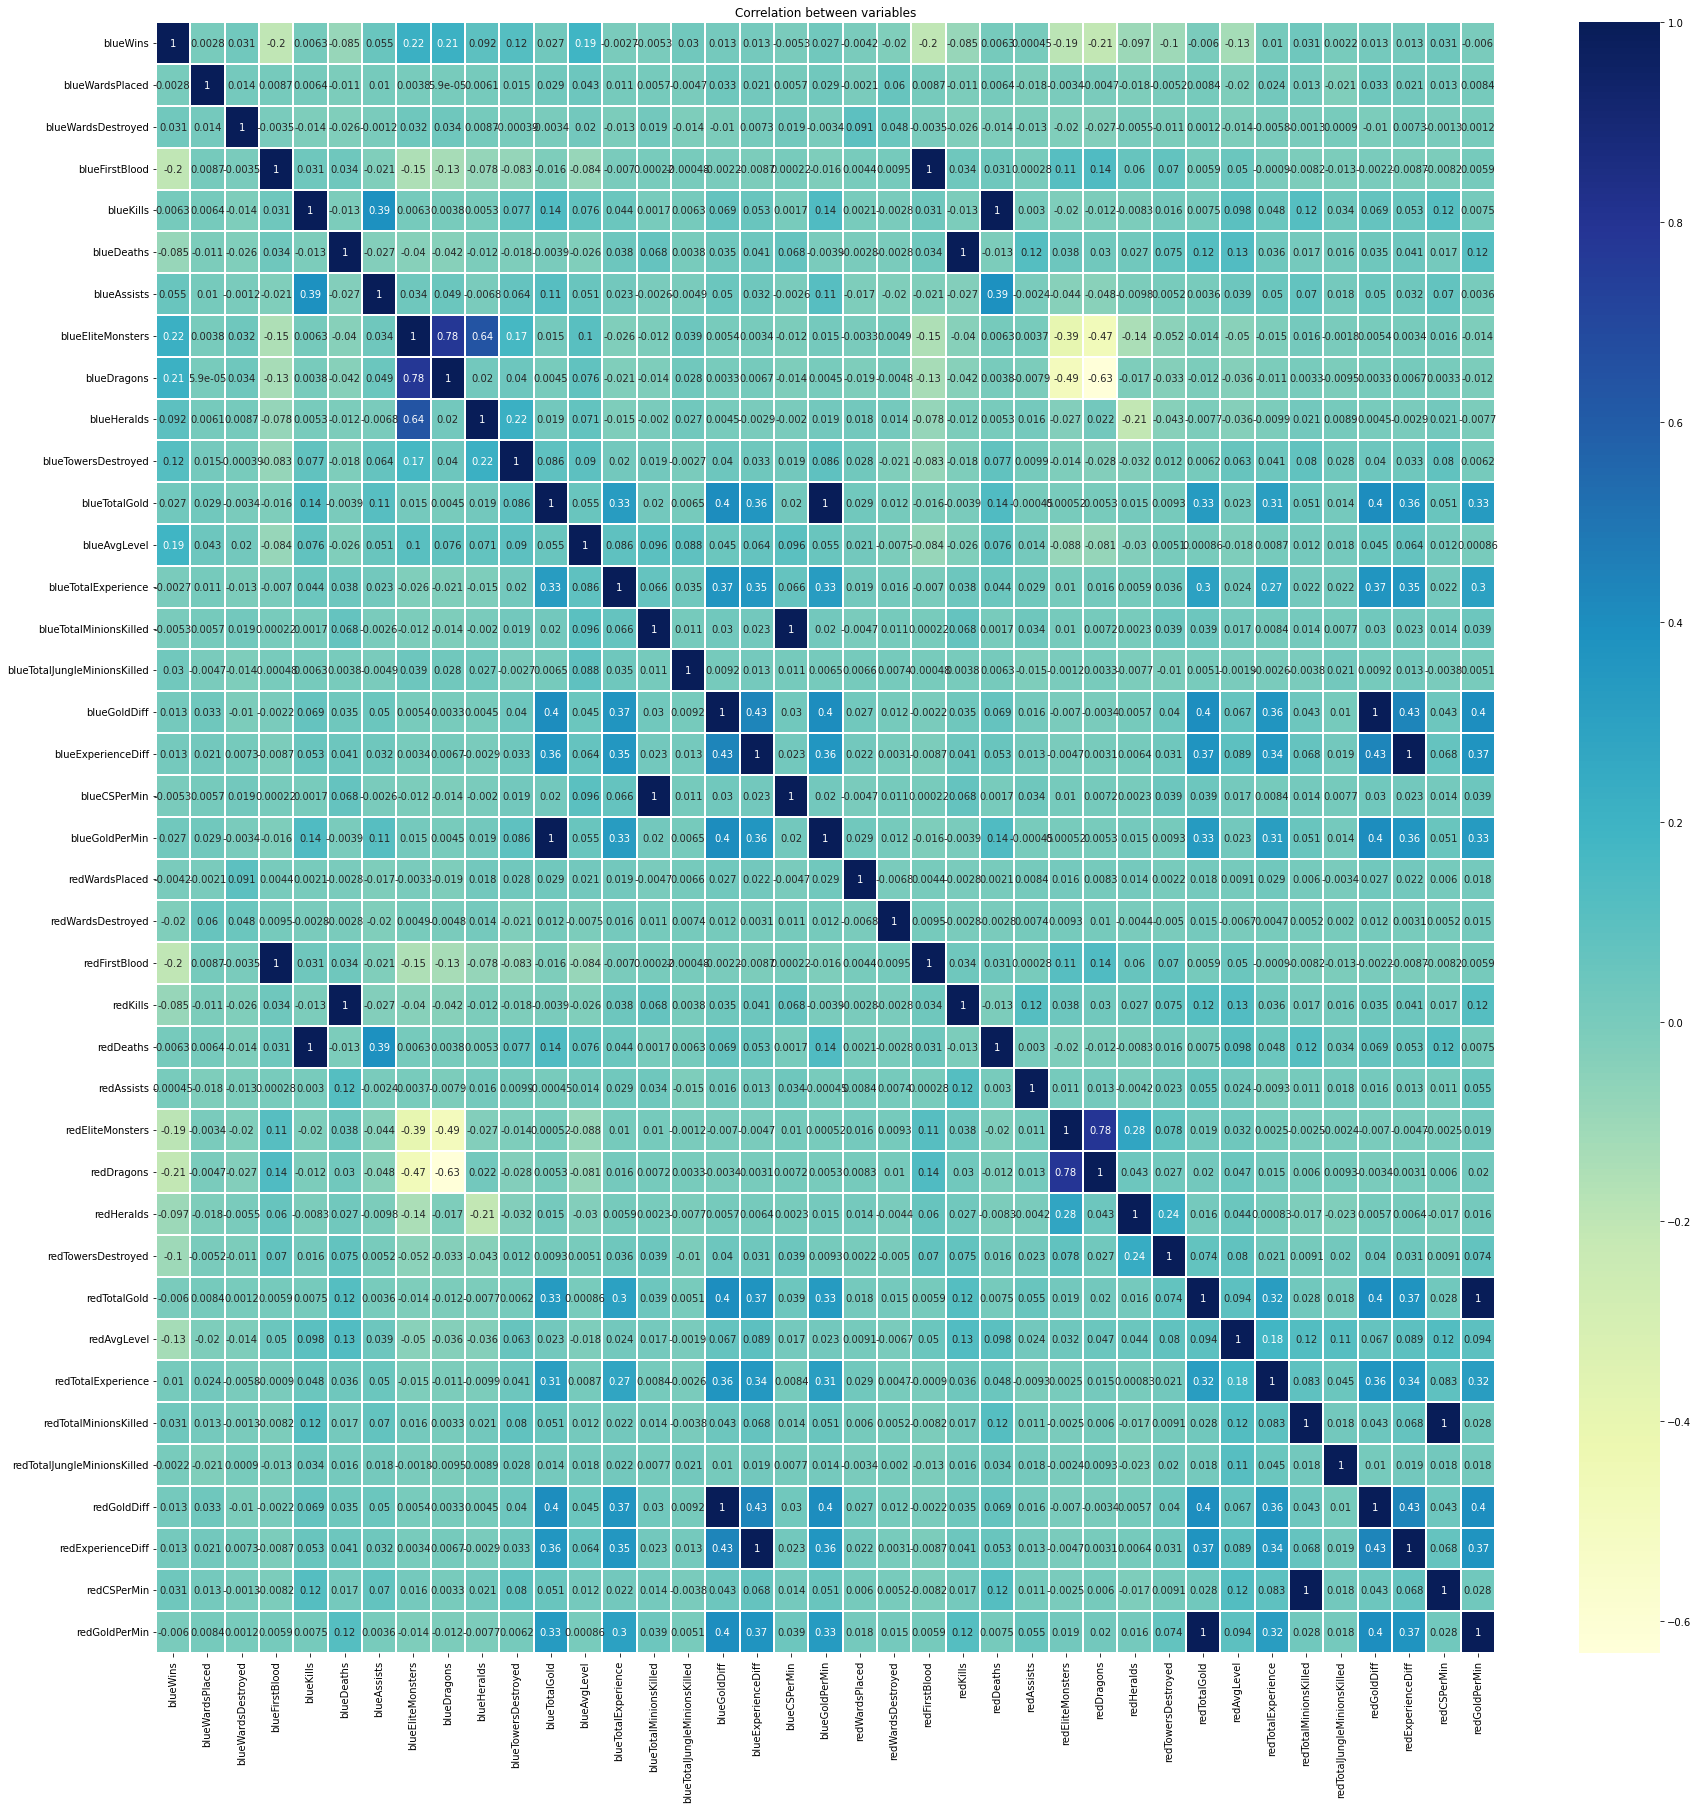

In [15]:
#calculate the coorelation 
rawCorr = dfRaw.apply(lambda x: pd.factorize(x)[0])
correlation = rawCorr.corr()

plt.figure(figsize=(30,30))
ax = sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, 
                 linewidths=0.1, cmap="YlGnBu",annot=True)
plt.title("Correlation between variables")

 

## Data explore

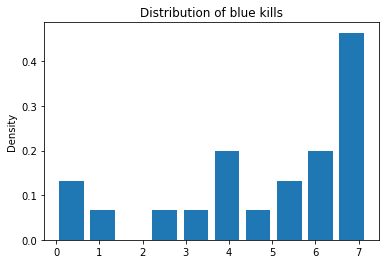

In [16]:
#distribution
blueKillDistribution = np.log(dfRaw['blueKills'].value_counts().values)
plt.hist(blueKillDistribution, density=True, rwidth=0.8)
plt.title('Distribution of blue kills')
plt.ylabel('Density')
plt.show()
 

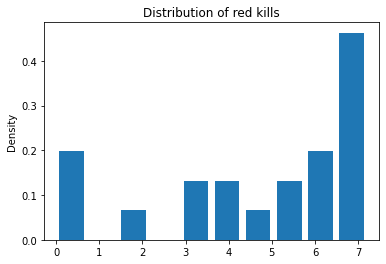

In [17]:
redKillDistribution = np.log(dfRaw['redKills'].value_counts().values)
plt.hist(redKillDistribution, density=True, rwidth=0.8)
plt.title('Distribution of red kills')
plt.ylabel('Density')
plt.show()

Text(0, 0.5, 'money per min')

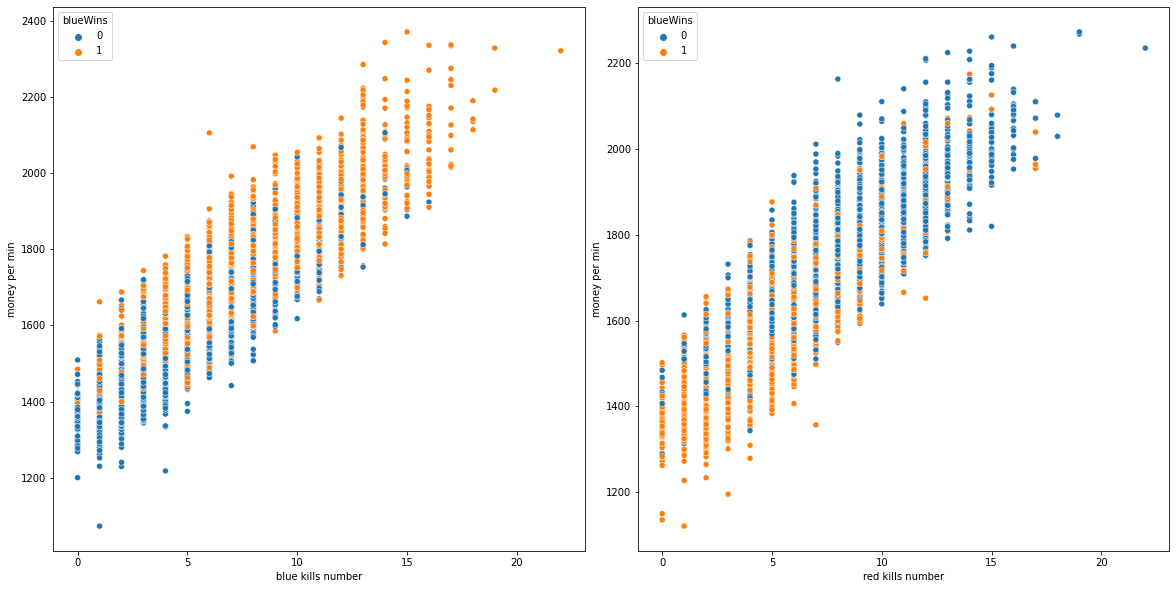

In [18]:
#money_per_kill = dfRaw.groupby('blueGoldPerMin').agg({'blueGoldPerMin':'mean','blueKills':'mean'})
#money_per_kill_red = dfRaw.groupby('redGoldPerMin').agg({'redGoldPerMin':'mean','redKills':'mean'})

fig, axes = plt.subplots(1, 2)
fig.set_figwidth(20)
fig.set_figheight(10)
fig.subplots_adjust(wspace=0.1)

sns.scatterplot(x='blueKills', y='blueGoldPerMin', hue = 'blueWins', data=dfRaw, ax=axes[0])
axes[0].set_xlabel('blue kills number')
axes[0].set_ylabel('money per min')


sns.scatterplot(x='redKills', y='redGoldPerMin', hue = 'blueWins',data = dfRaw, ax=axes[1])
axes[1].set_xlabel('red kills number')
axes[1].set_ylabel('money per min')
 
 

In [19]:
Dimond_rank = pd.read_csv('high_diamond_ranked_10min.csv')
Dimond_rank['killsDiff'] = Dimond_rank['blueKills'] - Dimond_rank['redKills']
Dimond_rank['assistsDiff'] = Dimond_rank['blueAssists'] - Dimond_rank['redAssists']
Dimond_rank['MinionskilledDiff'] = Dimond_rank['blueTotalMinionsKilled'] -  Dimond_rank['redTotalMinionsKilled']
Dimond_rank['EliteDiff'] = Dimond_rank['blueEliteMonsters'] - Dimond_rank['redEliteMonsters']
Dimond_rank['towerDiff'] = Dimond_rank['blueTowersDestroyed'] - Dimond_rank['redTowersDestroyed']

<AxesSubplot:xlabel='killsDiff', ylabel='assistsDiff'>

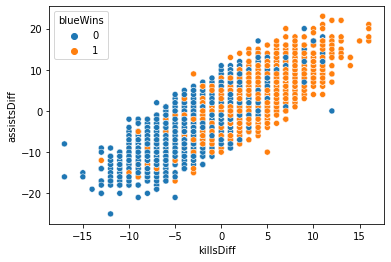

In [20]:
sns.scatterplot(x='killsDiff', y='assistsDiff', hue='blueWins', data=Dimond_rank)

In [ ]:
sns.scatterplot(x='MinionskilledDiff', y='EliteDiff', hue='blueWins', data=Dimond_rank)

In [ ]:
sns.pairplot(Dimond_rank, vars=['blueExperienceDiff','blueGoldDiff','EliteDiff','killsDiff','assistsDiff','MinionskilledDiff','towerDiff'], 
             hue='blueWins')